In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('digits.png')
#  
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#100 X 50
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

x = np.array(cells)

# train,test split 
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

k = np.arange(10)
# 라벨링을 만들기 위해서 2차원으로 변환
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

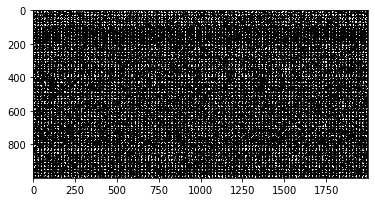

In [6]:
# 숫자가 적혀져 있는 그림
plt.imshow(img)

In [8]:
x.shape

(50, 100, 20, 20)

In [5]:
img.shape

(1000, 2000, 3)

In [7]:
knn = cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)

True

In [9]:
ret,result,neighbours,dist = knn.findNearest(test,k=5)

In [10]:
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size

In [11]:
print(accuracy)

91.76
